In [83]:
# Import Pandas
import pandas as pd
# Import Numpy
import numpy as np
# Import Bokeh
#import bokeh.plotting as bk
#import bokeh.io as bi
#from bokeh.io import export_svgs
#bi.output_notebook()
import matplotlib.pyplot as plt
from Algorithms import cm2in
from Algorithms import TUBScolorscale
# Make the relevant Inputs
export_folder = "../Latex/Graphics/"
model_name = "SISO_Robustness_PTN"

# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5

# Read the Data
Data = pd.read_csv('./Experiments/SISO/SISO_06102017_PTN.csv', sep=';')
# Give the Columns
Data.columns

Index([u'Unnamed: 0', u'Sample No.', u'Order', u'K', u'TSum', u'L', u'KM',
       u'TM', u'LM', u'MS Real', u'MS Ideal', u'MT Real', u'MT Ideal'],
      dtype='object')

In [84]:
# Sample Count
msreal_sample = Data['MS Real']
msreal_sample = msreal_sample.notnull().sum()

# Get Data above 2
msreal_unstable = Data[Data['MS Real']>2.0]
msreal_unstable = msreal_unstable['MS Real'].notnull().sum()

msreal_sample, msreal_unstable

(9000, 0)

# Plot the Evaluation

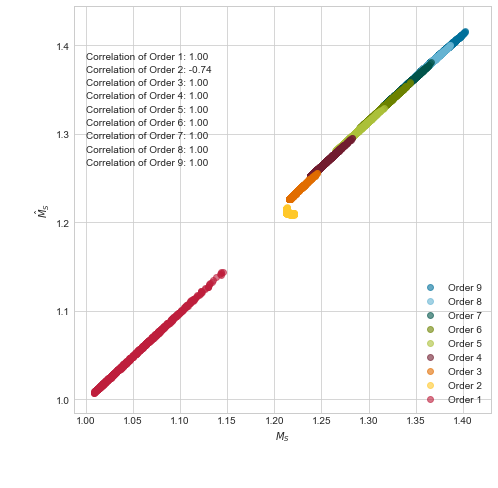

In [85]:
# Get the variables
mscount_real = 0
mscount_iden = 0
x = []
y = []
order=[]
x2 = []
y2 = []

# Make a plot
plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_width))

# Loop over the data, backwards
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['MS Real']
    ms_re = Data[((Data['Order'] == cur_order))]['MS Ideal']
    x.append(np.mean(ms_id))
    x2.append(np.var(ms_id))
    y.append(np.mean(ms_re))
    y2.append(np.var(ms_re))
    order.append(cur_order)
    # Add to the plot
    ax.scatter(ms_re,ms_id, label = "Order "+str(cur_order), color = TUBScolorscale[cur_order], alpha = 0.6)
    # Compute the correlation
    corr = np.corrcoef(ms_re,ms_id)
    ax.annotate('Correlation of Order '+str(cur_order)+': '+'%.2f'%(corr[1,0]),
            xy=(1., 1.4-0.015*cur_order), xycoords='data',
                xytext=(1.,1.4-0.015*cur_order),textcoords='data')

# Make Annotations
#ax.annotate('Order 2 not visible',
#            xy=(1.0, 1.2), xycoords='data',
#            xytext=(1.2, 1.1), textcoords='data',
#            arrowprops=dict(arrowstyle="->"))

ax.annotate('No. of samples: '+str(msreal_sample)+"\nNo. of unstable systems: "+str(msreal_unstable),
            xy=(1., 1.45), xycoords='data',
            xytext=(1., 1.45), textcoords='data')

ax.grid(True)
ax.set_ylabel('$\hat{M}_S$')
ax.set_xlabel('$M_S$')

plt.legend(loc="lower right")
plt.savefig(export_folder+model_name+"_MS_CORR.svg")
plt.show()

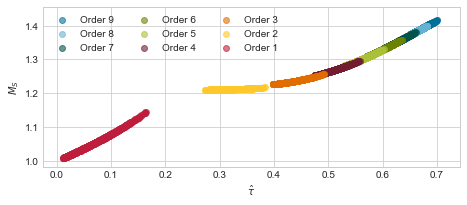

In [86]:
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_height))

# Loop over the data, backwards
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['MS Real']
    ms_re = Data[((Data['Order'] == cur_order))]['LM']/(Data[((Data['Order'] == cur_order))]['TM']+Data[((Data['Order'] == cur_order))]['LM'])
    # Add to the plot
    ax.scatter(ms_re,ms_id, label = "Order "+str(cur_order), color = TUBScolorscale[cur_order], alpha = 0.6)

ax.grid(True)
ax.set_ylabel('$M_S$')
ax.set_xlabel('$\hat{\\tau}$')

plt.legend(loc="upper left", ncol = 3)
plt.savefig(export_folder+model_name+"_MS_Tau.svg")
plt.show()

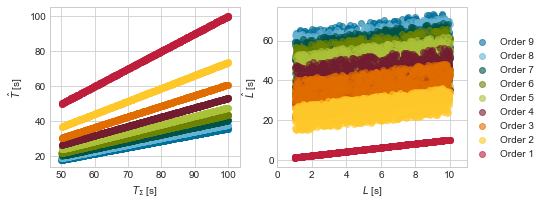

In [88]:
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
fig, ax = plt.subplots(1,2, sharex=False, figsize = cm2in(plot_width,plot_height))

# Loop over the data, backwards
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['TM']
    ms_re = Data[((Data['Order'] == cur_order))]['TSum']
    # Add to the plot
    ax[0].scatter(ms_re,ms_id, label = "Order "+str(cur_order), color = TUBScolorscale[cur_order], alpha = 0.6)

ax[0].grid(True)
ax[0].set_ylabel('$\hat{T}$ [s]')
ax[0].set_xlabel('$T_\Sigma$ [s]')

plt.legend(loc="upper left")

# Loop over the data, backwards
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['LM']
    ms_re = Data[((Data['Order'] == cur_order))]['L']
    # Add to the plot
    ax[1].scatter(ms_re,ms_id, label = "Order "+str(cur_order), color = TUBScolorscale[cur_order], alpha = 0.6)

ax[1].grid(True)
ax[1].set_ylabel('$\hat{L}$ [s]')
ax[1].set_xlabel('$L$ [s]')
ax[1].set_xlim(0,11)

plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.4,0.0))
#plt.savefig(export_folder+model_name+"_MS_L.svg")
#plt.show()

plt.savefig(export_folder+model_name+"_MS_TL.svg")
plt.show()

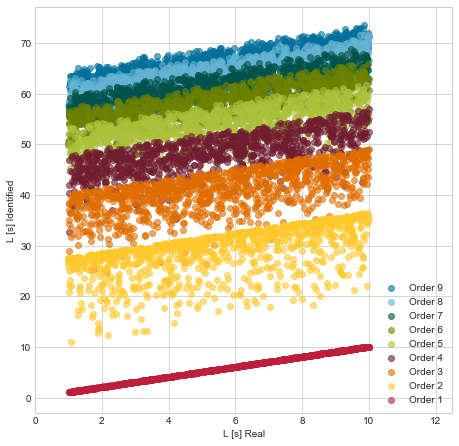

In [56]:
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_width))

# Loop over the data, backwards
for cur_order in range(9,0,-1):
    # Load the Data
    ms_id = Data[((Data['Order'] == cur_order))]['LM']
    ms_re = Data[((Data['Order'] == cur_order))]['L']
    # Add to the plot
    ax.scatter(ms_re,ms_id, label = "Order "+str(cur_order), color = TUBScolorscale[cur_order], alpha = 0.6)

ax.grid(True)
ax.set_ylabel('L [s] Identified')
ax.set_xlabel('L [s] Real')
ax.set_xlim(0,12.5)

plt.legend(loc="lower right", ncol=1)
plt.savefig(export_folder+model_name+"_MS_L.svg")
plt.show()

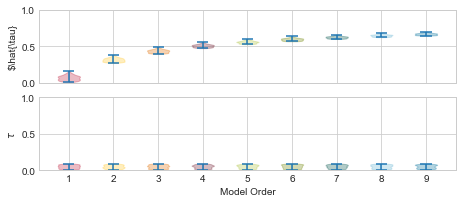

In [90]:
# Create a Plot for the normalized Time
# Empty dicts for storage
y = []
y2 = []
order = []

# Make a plot
plt.clf()
fig, ax = plt.subplots(2, sharex=True, figsize = cm2in(plot_width,plot_height))
# Data iteration
for cur_order in range(1,10):
    #x.append(Data[((Data['Order'] == cur_order))]['Order'])
    y.append(Data[((Data['Order'] == cur_order))]['LM']/(Data[((Data['Order'] == cur_order))]['TM']+Data[((Data['Order'] == cur_order))]['LM']))
    y2.append(Data[((Data['Order'] == cur_order))]['L']/(100.+Data[((Data['Order'] == cur_order))]['L']))
    order.append(cur_order)

parts = ax[0].violinplot(y)
parts2 = ax[1].violinplot(y2)

counter = 1
for pc in parts['bodies']:
    pc.set_facecolor(TUBScolorscale[counter])
    pc.set_edgecolor(TUBScolorscale[counter])
    counter = counter+1
counter = 1
for pc in parts2['bodies']:
    pc.set_facecolor(TUBScolorscale[counter])
    pc.set_edgecolor(TUBScolorscale[counter])
    counter = counter+1

from matplotlib.ticker import MultipleLocator
ax[0].xaxis.set_major_locator(MultipleLocator(1))
ax[0].set_ylabel("$\hat{\\tau}")
ax[0].set_ylim([0,1])

ax[1].xaxis.set_major_locator(MultipleLocator(1))
ax[1].set_xlabel("Model Order")
ax[1].set_ylabel("$\\tau$")
ax[1].set_ylim([0,1])

plt.savefig(export_folder+model_name+"_NormalizedTime.svg")
plt.show()

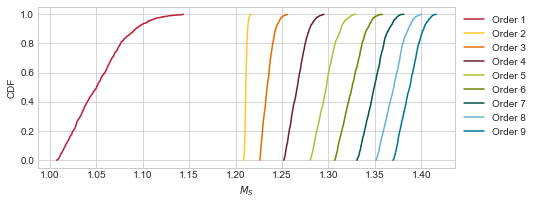

In [89]:
# Make a histogram
from scipy.stats import norm
plt.clf()
fig, ax = plt.subplots(1, sharex=True, figsize = cm2in(plot_width,plot_height))
x = []
y = []
for cur_order in range(1,10):
    x = np.sort(Data[((Data['Order'] == cur_order))]['MS Real'])
    # Get the cdf
    y = np.array(range(len(x)))/float(len(x))
    ax.plot(x,y, color = TUBScolorscale[cur_order], label="Order "+str(cur_order))
#ax.hist(x, 500, normed=1, histtype='stepfilled',stacked= True, color=TUBScolorscale[1:10], alpha = 0.7)
ax.set_xlabel('$M_S$')
ax.set_ylabel('CDF')
ax.legend(loc="upper left" ,bbox_to_anchor=(1.0,1.0))
plt.savefig(export_folder+model_name+"_MS_CDF.svg")
plt.show()

In [65]:
0.3/1.3

0.23076923076923075